# Análisis exploratorio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [3]:
df = pd.read_csv('./results/experimentacion/UC3/hito3.csv')
df["mean"] = df.mean(numeric_only=True, axis=1)
df

,empresa_1,empresa_2,empresa_3,mean
0,0.562830,0.790333,0.435621,0.596261
1,0.563708,0.789027,0.438457,0.597064
2,0.566344,0.782495,0.445831,0.598223
3,0.570738,0.775963,0.459444,0.602049
4,0.578647,0.773351,0.473624,0.608541
...,...,...,...,...
60,0.678823,0.699543,0.686330,0.688232
61,0.678823,0.699543,0.686330,0.688232
62,0.678823,0.699543,0.686330,0.688232
63,0.678823,0.699543,0.686330,0.688232


In [2]:
df = pd.read_csv("./data/horizontal/empresa_2/cliente_1.csv")

df.head(10)

,psd_delta,psd_theta,psd_alpha,psd_beta,psd_gamma,eog_blinks,eog_var,y_reg,y_class
0,1.305710e+07,1.945174e+06,8.350721e+05,582391.139425,503931.675274,0,1.037713e-10,0.119233,False
1,1.316114e+07,1.744535e+06,7.364743e+05,525038.985724,423838.617027,1,6.786951e-09,0.149089,False
2,6.110334e+06,1.538639e+06,7.639427e+05,498007.080396,454352.799634,2,7.330638e-09,0.177563,False
3,6.245169e+06,1.476267e+06,6.425352e+05,461100.468244,484138.573812,2,2.657537e-09,0.194524,False
4,2.192558e+07,1.996175e+06,8.657071e+05,524294.156610,469608.907826,2,3.379798e-09,0.220294,False
5,5.293694e+06,1.574322e+06,1.306561e+06,520706.516106,406643.214169,0,9.780409e-11,0.250505,False
6,1.128205e+07,1.748922e+06,8.659507e+05,532840.793747,476667.471274,0,1.611079e-10,0.277601,False
7,1.231788e+07,1.804999e+06,8.834435e+05,550807.455771,497999.874953,3,4.298973e-09,0.304634,False
8,1.415906e+07,1.964146e+06,9.456553e+05,549177.173852,486123.272008,6,1.369031e-08,0.325717,False
9,1.738014e+07,2.216037e+06,1.060389e+06,747321.174198,782080.224865,5,9.058930e-09,0.334196,False


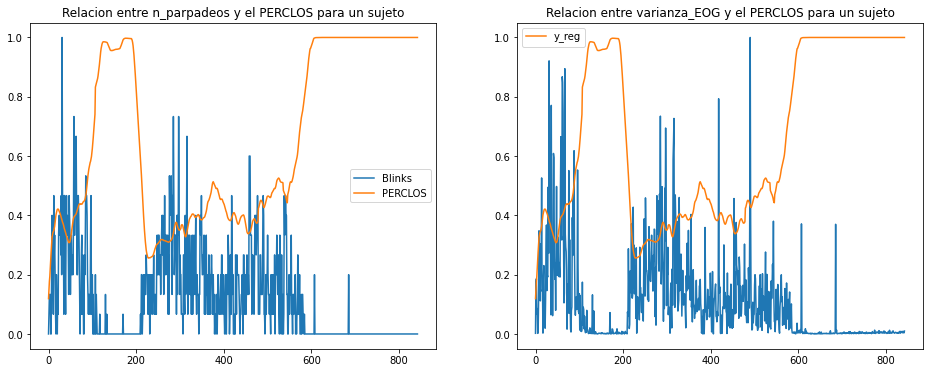

In [3]:
fig, axes = plt.subplots(figsize=(16,6),nrows=1, ncols=2)


axes[0].plot(minmax_scale(df["eog_blinks"]), label="Blinks")
df["y_reg"].plot(ax=axes[0], label="PERCLOS")
axes[0].set_title("Relacion entre n_parpadeos y el PERCLOS para un sujeto")
axes[0].legend()

axes[1].plot(minmax_scale(df["eog_var"]))
df["y_reg"].plot(ax=axes[1])
axes[1].set_title("Relacion entre varianza_EOG y el PERCLOS para un sujeto")
axes[1].legend()

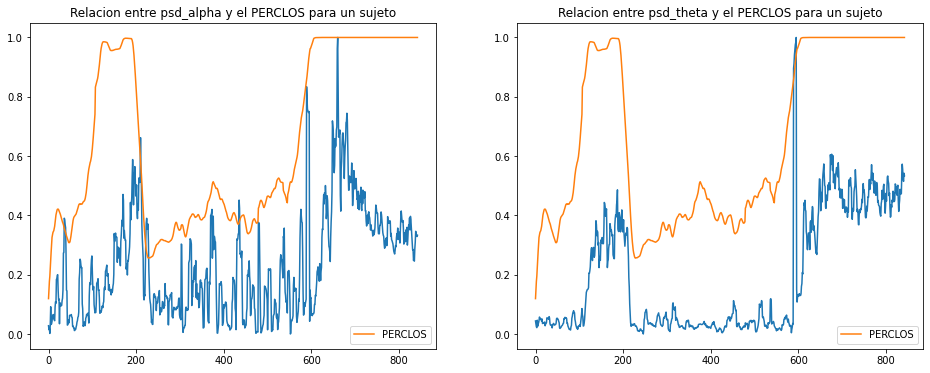

In [4]:
fig, axes = plt.subplots(figsize=(16,6), nrows=1, ncols=2)

axes[0].plot(minmax_scale(df["psd_alpha"]))
df["y_reg"].plot(ax=axes[0], label="PERCLOS")
axes[0].set_title("Relacion entre psd_alpha y el PERCLOS para un sujeto")
axes[0].legend()

axes[1].plot(minmax_scale(df["psd_theta"]))
df["y_reg"].plot(ax=axes[1], label="PERCLOS")
axes[1].set_title("Relacion entre psd_theta y el PERCLOS para un sujeto")
axes[1].legend()

# non-IID

## Diferente distribución de clases

In [5]:
def prepare_model_data(client_file):
    df = pd.read_csv(client_file)
    
    train, test = train_test_split(df, test_size=0.30, random_state=42)
    
    X_train = train[['psd_delta', 'psd_theta', 'psd_alpha', 'psd_beta', 'psd_gamma','eog_blinks', 'eog_var']]
    X_test = test[['psd_delta', 'psd_theta', 'psd_alpha', 'psd_beta', 'psd_gamma','eog_blinks', 'eog_var']]
    y_train = train['y_class']
    y_test = test['y_class']
    
    scaler = StandardScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test

In [6]:
def cargar_dataset_varios_clientes(clientes):
    base_path = "./data/centralizado"
    
    X_train, X_val, y_train, y_val = prepare_model_data(f'{base_path}/cliente_{clientes[0]}.csv')
    
    for cid in clientes[1:]:
        path = f'{base_path}/cliente_{cid}.csv'
        X_train_act, X_val_act, y_train_act, y_val_act = prepare_model_data(path)
    
        X_train = np.vstack((X_train, X_train_act))
        X_val = np.vstack((X_val, X_val_act))
        y_train = np.concatenate((y_train, y_train_act))
        y_val = np.concatenate((y_val, y_val_act))
        
    return X_train, X_val, y_train, y_val

Text(0.5, 0.98, 'Distribución de clases de los clientes para la empresa 1')

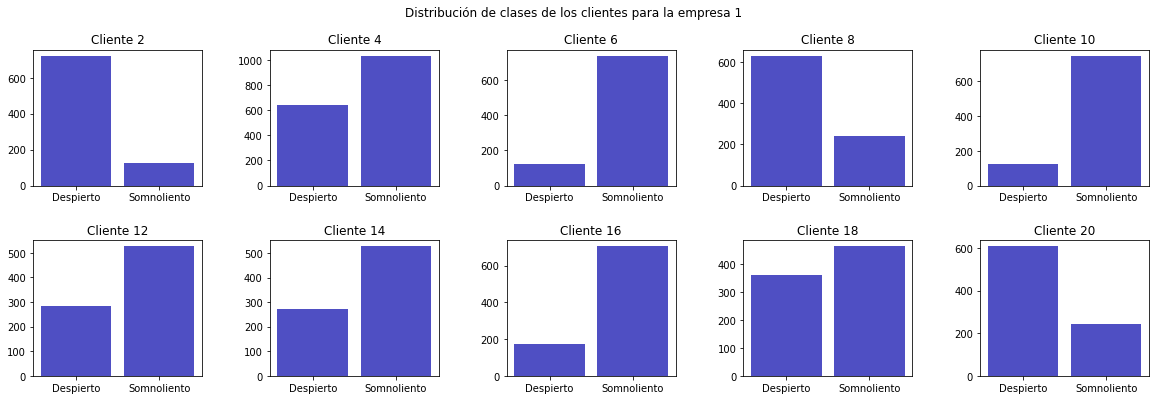

In [7]:
base_path = "./data/horizontal/"
fig = plt.figure(figsize=(20,6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, cliente in enumerate(range(2,22,2)):
    path = f"{base_path}empresa_1/cliente_{cliente}.csv"
    x_train, x_val, y_train, y_val = prepare_model_data(path)
    
    y = np.concatenate((y_train, y_val)).astype(int)
    
    ax = fig.add_subplot(2,5,i+1)
    
    ax.hist(x=y, bins=2, color='#0504aa', alpha=0.7, rwidth=0.85)
    ax.set_xticks([0.25, 0.75])
    ax.set_xticklabels(["Despierto", "Somnoliento"])
    ax.set_title(f"Cliente {cliente}")
    
fig.suptitle("Distribución de clases de los clientes para la empresa 1")

Text(0.5, 0.98, 'Distribución de clases de los clientes para la empresa 2')

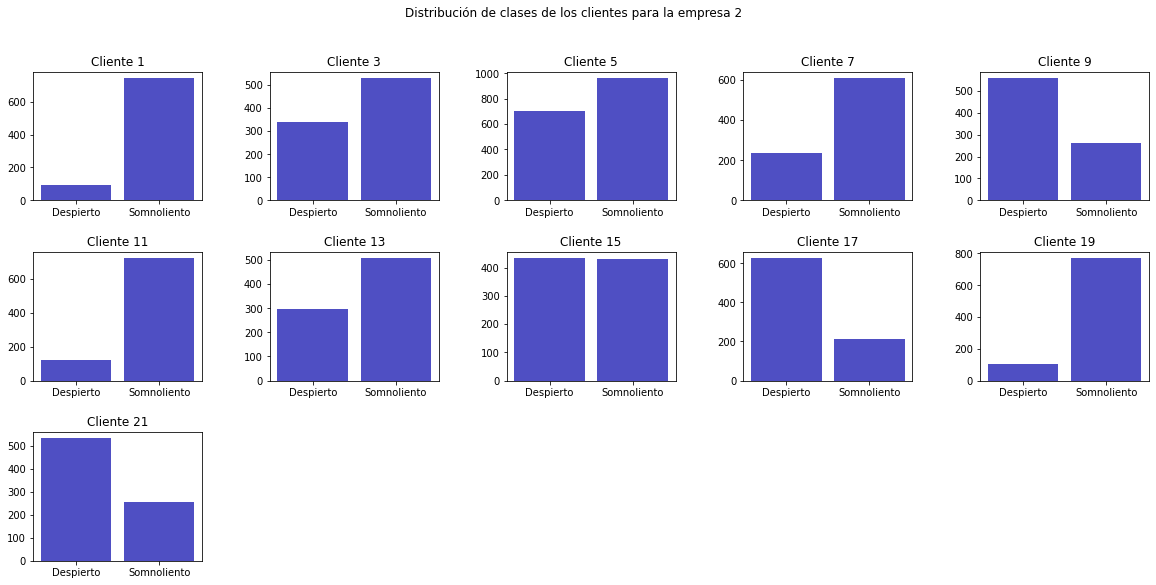

In [8]:
base_path = "./data/horizontal/"
fig = plt.figure(figsize=(20,9))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, cliente in enumerate(range(1,22,2)):
    path = f"{base_path}empresa_2/cliente_{cliente}.csv"
    x_train, x_val, y_train, y_val = prepare_model_data(path)
    
    y = np.concatenate((y_train, y_val)).astype(int)
    
    ax = fig.add_subplot(3,5,i+1)
    
    ax.hist(x=y, bins=2, color='#0504aa', alpha=0.7, rwidth=0.85)
    ax.set_xticks([0.25, 0.75])
    ax.set_xticklabels(["Despierto", "Somnoliento"])
    ax.set_title(f"Cliente {cliente}")
    
fig.suptitle("Distribución de clases de los clientes para la empresa 2")

## Clustering en base a la distribucion de clases

- Empresa A: D ≈ S
- Empresa B: D ≫ S
- Empresa C: S ≫ D

**Si la proporción de despiertos es 66% o superior => B**

**Si la proporción de somnolientos es 66% o superior => C**

**Sino => A**

In [9]:
empresa = {
    1: [],
    2: [],
    3: []
}

for cid in range(1,22):
    # leer datos
    base_path = "./data/horizontal/"
    path = f"{base_path}empresa_{(int(cid)%2)+1}/cliente_{cid}.csv"
    
    X_train, X_val, y_train, y_val = prepare_model_data(path)
    
    # agrupar train y test en un unico X e y
    
    X = np.vstack((X_train, X_val))
    y = np.concatenate((y_train, y_val))
    
    # calcular proporcion de clases
    total = np.size(y)
    som = np.count_nonzero(y)
    desp = total-som
    p_desp = desp/total
    p_som = som/total

#     print(f'Cid:{cid} --- T:{total}, Des:{desp/total}, Som:{som/total}')
    
    # mapear a A, B o C
    if p_desp > 0.33 and p_desp < 0.66:
        empresa[1].append(cid)
    elif p_desp >= 0.66:
        empresa[2].append(cid)
    else:
        empresa[3].append(cid)
    
empresa

{1: [3, 4, 5, 12, 13, 14, 15, 18],
 2: [2, 8, 9, 17, 20, 21],
 3: [1, 6, 7, 10, 11, 16, 19]}

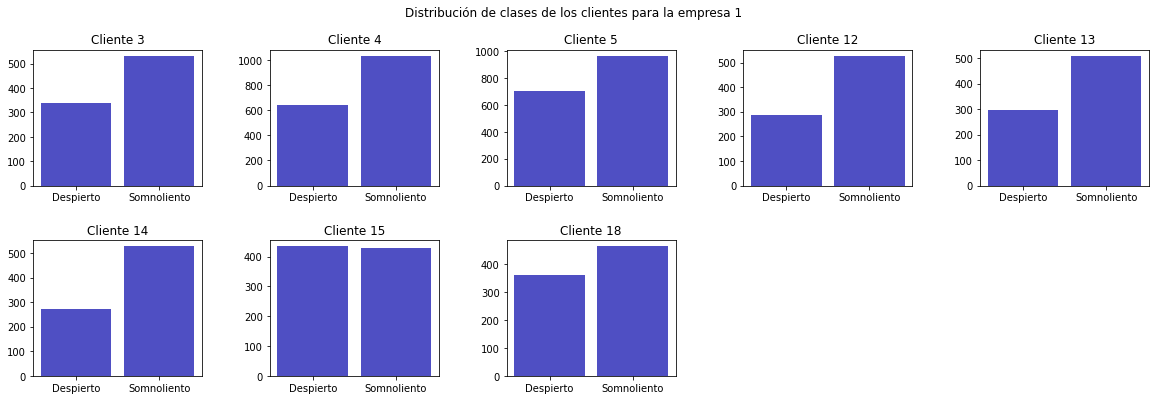

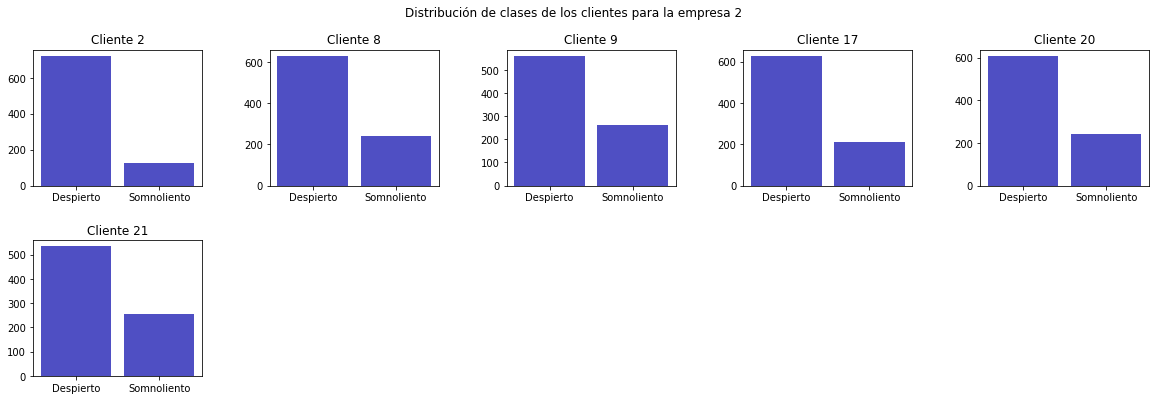

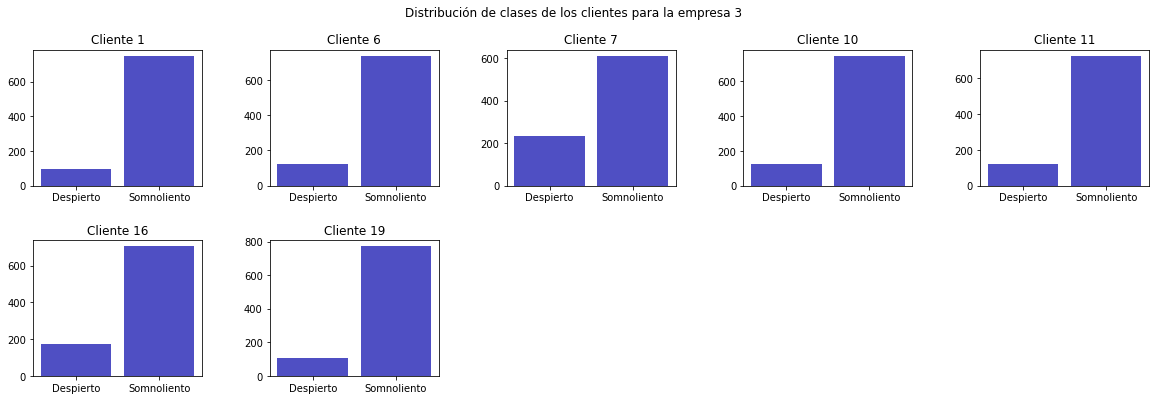

In [10]:
base_path = "./data/horizontal/"

for e in empresa:
    fig = plt.figure(figsize=(20,6))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for i, cid in enumerate(empresa[e]):
        path = f"{base_path}empresa_{(int(cid)%2)+1}/cliente_{cid}.csv"
        x_train, x_val, y_train, y_val = prepare_model_data(path)

        y = np.concatenate((y_train, y_val)).astype(int)

        ax = fig.add_subplot(2,5,i+1)

        ax.hist(x=y, bins=2, color='#0504aa', alpha=0.7, rwidth=0.85)
        ax.set_xticks([0.25, 0.75])
        ax.set_xticklabels(["Despierto", "Somnoliento"])
        ax.set_title(f"Cliente {cid}")
    
    fig.suptitle(f'Distribución de clases de los clientes para la empresa {e}')

## Distribuciones de las features para diferentes sujetos

In [11]:
from pandas.plotting import parallel_coordinates

In [12]:
average_values = pd.DataFrame(columns=['cliente', 'psd_delta', 'psd_theta', 'psd_alpha', 'psd_beta', 'psd_gamma','eog_blinks', 'eog_var', 'y_class'])

for i in range(1,22):
    df = pd.read_csv(f"./data/centralizado/cliente_{i}.csv")

    df_norm = df[['psd_delta', 'psd_theta', 'psd_alpha', 'psd_beta', 'psd_gamma','eog_blinks', 'eog_var']]

    df_norm = (df_norm-df_norm.mean())/df_norm.std()

    df_norm["y_class"] = df["y_class"]
    
    
    res = dict(df_norm[df_norm["y_class"] == 0].mean())
    res['cliente'] = i
    average_values = average_values.append(res, ignore_index=True)
    
    res = dict(df_norm[df_norm["y_class"] == 1].mean())
    res['cliente'] = i
    average_values = average_values.append(res, ignore_index=True)

average_values["cliente"] = average_values["cliente"].apply(lambda x: int(x))
average_values

,cliente,psd_delta,psd_theta,psd_alpha,psd_beta,psd_gamma,eog_blinks,eog_var,y_class
0,1,-0.454906,-0.759680,-0.681680,0.858093,1.012179,0.817201,0.809104,0.0
1,1,0.058462,0.097630,0.087605,-0.110277,-0.130079,-0.105022,-0.103981,1.0
2,2,0.054800,-0.102203,-0.084771,-0.058290,-0.051507,0.090671,0.084827,0.0
3,2,-0.313576,0.584831,0.485081,0.333547,0.294737,-0.518840,-0.485396,1.0
4,3,-0.144076,-0.089279,-0.070592,0.413804,0.353295,0.261539,0.350333,0.0
5,3,0.091438,0.056661,0.044801,-0.262622,-0.224219,-0.165986,-0.222340,1.0
6,4,-0.349842,-0.655552,-0.692951,0.033975,0.199767,0.232703,0.078476,0.0
7,4,0.216488,0.405666,0.428809,-0.021024,-0.123619,-0.144001,-0.048562,1.0
8,5,-0.134237,-0.240883,-0.295889,0.057916,0.067968,-0.032475,-0.030775,0.0
9,5,0.098171,0.176165,0.216392,-0.042356,-0.049707,0.023750,0.022507,1.0


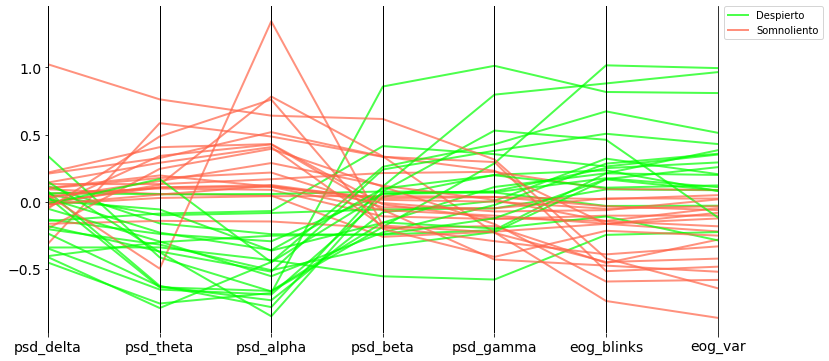

In [13]:
import matplotlib

f = plt.figure(figsize=(12,6))
ax = f.add_subplot()
ax.set_facecolor('white')
ax.tick_params(axis="both", which='major', labelsize=14)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.grid(b=None)

parallel_coordinates(average_values, 'y_class',
                    cols=['psd_delta', 'psd_theta', 'psd_alpha', 'psd_beta', 'psd_gamma','eog_blinks', 'eog_var'],
                    color=["lime", "tomato"],
                    alpha=.7,
                    lw=2, 
                    axvlines_kwds={"color":"black", "lw": 1},)

L = plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, ncol=1)
L.get_texts()[0].set_text('Despierto')
L.get_texts()[1].set_text('Somnoliento')

# f.savefig('./non-IID.pdf',bbox_extra_artists=(L,), bbox_inches='tight')

# Eval baseline models

## Individual

In [15]:
df = pd.read_csv("./results/resultados-modelos-individuales.csv")

df["cliente"] = df["cliente"].apply(lambda x: int(x))
df["accuracy"] = (df["tp"]+df["tn"])/(df["tp"]+df["tn"]+df["fp"]+df["fn"])
df["tpr"] = (df["tp"])/(df["tp"]+df["fn"])
df["tnr"] = (df["tn"])/(df["tn"]+df["fp"])
df["f1_score"] = (df["tp"])/( df["tp"] + (df["fp"]+df["fn"])/2 )

df = df.sort_values(by=["cliente"])

print(df[["cliente", "accuracy", "tpr", "tnr", "f1_score"]].round(2))

print(f'{df[["accuracy", "tpr", "tnr", "f1_score"]].mean().round(2)}\n{df[["accuracy", "tpr", "tnr", "f1_score"]].std().round(2)}')

    cliente  accuracy   tpr   tnr  f1_score
0         1      0.93  0.94  0.76      0.96
1         2      0.91  0.55  0.98      0.67
2         3      0.82  0.88  0.73      0.86
3         4      0.82  0.89  0.70      0.86
4         5      0.83  0.81  0.86      0.85
5         6      0.85  0.98  0.15      0.92
6         7      0.83  0.92  0.60      0.89
7         8      0.85  0.64  0.93      0.70
8         9      0.81  0.42  0.98      0.57
9        10      0.90  1.00  0.34      0.94
10       11      0.89  0.94  0.61      0.94
11       12      0.96  0.94  1.00      0.97
12       13      0.94  0.94  0.93      0.95
13       14      0.76  0.80  0.69      0.82
14       15      0.85  0.84  0.86      0.84
15       16      0.92  0.96  0.76      0.95
16       17      0.95  0.81  0.99      0.88
17       18      0.87  0.77  0.98      0.87
18       19      0.94  1.00  0.58      0.97
19       20      0.95  0.84  0.98      0.89
20       21      0.89  0.72  0.97      0.81
accuracy    0.88
tpr         0.8

**Agrupados por empresa para el UC1/2**

In [16]:
IDS_EMPRESA = {
    1: [3,4,5,12,  2,8,  1],
    2: [13,14,    6,7,10,11,16],
    3: [15,18,  9,17,20,21,  19]
}

df["empresa"] = [1,1,1,1,1,2,2,1,3,2,2,1,2,2,3,2,3,3,3,3,3]

for e, data in df.groupby("empresa"):
    data = data.sort_values(by=["cliente"])
    print(data[["empresa", "cliente", "accuracy", "tpr", "tnr", "f1_score"]].round(2))
    print(f'{data[["accuracy", "tpr", "tnr", "f1_score"]].mean().round(2)}\n{data[["accuracy", "tpr", "tnr", "f1_score"]].std().round(2)}')

    empresa  cliente  accuracy   tpr   tnr  f1_score
0         1        1      0.93  0.94  0.76      0.96
1         1        2      0.91  0.55  0.98      0.67
2         1        3      0.82  0.88  0.73      0.86
3         1        4      0.82  0.89  0.70      0.86
4         1        5      0.83  0.81  0.86      0.85
7         1        8      0.85  0.64  0.93      0.70
11        1       12      0.96  0.94  1.00      0.97
accuracy    0.87
tpr         0.81
tnr         0.85
f1_score    0.84
dtype: float64
accuracy    0.06
tpr         0.15
tnr         0.12
f1_score    0.12
dtype: float64
    empresa  cliente  accuracy   tpr   tnr  f1_score
5         2        6      0.85  0.98  0.15      0.92
6         2        7      0.83  0.92  0.60      0.89
9         2       10      0.90  1.00  0.34      0.94
10        2       11      0.89  0.94  0.61      0.94
12        2       13      0.94  0.94  0.93      0.95
13        2       14      0.76  0.80  0.69      0.82
15        2       16      0.92  0.96  0

## Empresa

In [55]:
df = pd.read_csv("./results/resultados-modelos-empresa.csv")

df["cliente"] = df["cliente"].apply(lambda x: int(x))
df["accuracy"] = (df["tp"]+df["tn"])/(df["tp"]+df["tn"]+df["fp"]+df["fn"])
df["tpr"] = (df["tp"])/(df["tp"]+df["fn"])
df["tnr"] = (df["tn"])/(df["tn"]+df["fp"])
df["f1_score"] = (df["tp"])/( df["tp"] + (df["fp"]+df["fn"])/2 )

# df = df.sort_values(by=["cliente"])

print(df[["empresa", "cliente", "accuracy", "tpr", "tnr", "f1_score"]].round(2))

print(f'{df[["accuracy", "tpr", "tnr", "f1_score"]].mean().round(2)}\n{df[["accuracy", "tpr", "tnr", "f1_score"]].std().round(2)}')

      empresa  cliente  accuracy   tpr   tnr  f1_score
0   empresa_1       10      0.76  0.76  0.74      0.84
1   empresa_1       12      0.94  0.92  0.99      0.95
2   empresa_1       14      0.78  0.79  0.76      0.83
3   empresa_1       16      0.91  0.94  0.78      0.94
4   empresa_1       18      0.84  0.82  0.88      0.85
5   empresa_1        2      0.64  0.90  0.59      0.45
6   empresa_1       20      0.80  0.82  0.79      0.68
7   empresa_1        4      0.79  0.81  0.77      0.83
8   empresa_1        6      0.83  0.94  0.23      0.91
9   empresa_1        8      0.80  0.60  0.88      0.63
10  empresa_2        1      0.88  0.89  0.76      0.93
11  empresa_2       11      0.77  0.82  0.45      0.86
12  empresa_2       13      0.81  0.91  0.63      0.85
13  empresa_2       15      0.79  0.84  0.75      0.79
14  empresa_2       17      0.77  0.85  0.74      0.63
15  empresa_2       19      0.83  0.85  0.67      0.90
16  empresa_2       21      0.86  0.77  0.91      0.79
17  empres

In [56]:
for e, data in df.groupby("empresa"):
    data = data.sort_values(by=["cliente"])
    print(data[["empresa", "cliente", "accuracy", "tpr", "tnr", "f1_score"]].round(2))
    print(f'{data[["accuracy", "tpr", "tnr", "f1_score"]].mean().round(2)}\n{data[["accuracy", "tpr", "tnr", "f1_score"]].std().round(2)}')

     empresa  cliente  accuracy   tpr   tnr  f1_score
5  empresa_1        2      0.64  0.90  0.59      0.45
7  empresa_1        4      0.79  0.81  0.77      0.83
8  empresa_1        6      0.83  0.94  0.23      0.91
9  empresa_1        8      0.80  0.60  0.88      0.63
0  empresa_1       10      0.76  0.76  0.74      0.84
1  empresa_1       12      0.94  0.92  0.99      0.95
2  empresa_1       14      0.78  0.79  0.76      0.83
3  empresa_1       16      0.91  0.94  0.78      0.94
4  empresa_1       18      0.84  0.82  0.88      0.85
6  empresa_1       20      0.80  0.82  0.79      0.68
accuracy    0.81
tpr         0.83
tnr         0.74
f1_score    0.79
dtype: float64
accuracy    0.08
tpr         0.10
tnr         0.21
f1_score    0.16
dtype: float64
      empresa  cliente  accuracy   tpr   tnr  f1_score
10  empresa_2        1      0.88  0.89  0.76      0.93
17  empresa_2        3      0.73  0.73  0.73      0.77
18  empresa_2        5      0.80  0.81  0.79      0.83
19  empresa_2       

## Empresa v2

In [41]:
df = pd.read_csv("./results/resultados-modelos-empresa_v2.csv")

df["cliente"] = df["cliente"].apply(lambda x: int(x))
df["accuracy"] = (df["tp"]+df["tn"])/(df["tp"]+df["tn"]+df["fp"]+df["fn"])
df["tpr"] = (df["tp"])/(df["tp"]+df["fn"])
df["tnr"] = (df["tn"])/(df["tn"]+df["fp"])
df["f1_score"] = (df["tp"])/( df["tp"] + (df["fp"]+df["fn"])/2 )

# df = df.sort_values(by=["cliente"])

print(df[["empresa", "cliente", "accuracy", "tpr", "tnr", "f1_score"]].round(2))

print(f'{df[["accuracy", "tpr", "tnr", "f1_score"]].mean().round(2)}\n{df[["accuracy", "tpr", "tnr", "f1_score"]].std().round(2)}')

      empresa  cliente  accuracy   tpr   tnr  f1_score
0   empresa_1       12      0.94  0.91  0.99      0.95
1   empresa_1       13      0.89  0.94  0.82      0.92
2   empresa_1       14      0.73  0.69  0.80      0.77
3   empresa_1       15      0.81  0.84  0.79      0.80
4   empresa_1       18      0.78  0.74  0.84      0.79
5   empresa_1        3      0.74  0.70  0.81      0.77
6   empresa_1        4      0.81  0.85  0.74      0.85
7   empresa_1        5      0.76  0.77  0.76      0.80
8   empresa_2       17      0.92  0.73  0.98      0.82
9   empresa_2        2      0.81  0.50  0.87      0.47
10  empresa_2       20      0.89  0.75  0.94      0.78
11  empresa_2       21      0.86  0.67  0.95      0.75
12  empresa_2        8      0.79  0.48  0.91      0.56
13  empresa_2        9      0.81  0.41  0.97      0.56
14  empresa_3        1      0.89  0.89  0.86      0.93
15  empresa_3       10      0.87  0.96  0.32      0.93
16  empresa_3       11      0.82  0.92  0.24      0.90
17  empres

In [54]:
for e, data in df.groupby("empresa"):
    data = data.sort_values(by=["cliente"])
    print(data[["empresa", "cliente", "accuracy", "tpr", "tnr", "f1_score"]].round(2))
    print(f'{data[["accuracy", "tpr", "tnr", "f1_score"]].mean().round(2)}\n{data[["accuracy", "tpr", "tnr", "f1_score"]].std().round(2)}')

     empresa  cliente  accuracy   tpr   tnr  f1_score
5  empresa_1        3      0.74  0.70  0.81      0.77
6  empresa_1        4      0.81  0.85  0.74      0.85
7  empresa_1        5      0.76  0.77  0.76      0.80
0  empresa_1       12      0.94  0.91  0.99      0.95
1  empresa_1       13      0.89  0.94  0.82      0.92
2  empresa_1       14      0.73  0.69  0.80      0.77
3  empresa_1       15      0.81  0.84  0.79      0.80
4  empresa_1       18      0.78  0.74  0.84      0.79
accuracy    0.81
tpr         0.81
tnr         0.82
f1_score    0.83
dtype: float64
accuracy    0.07
tpr         0.09
tnr         0.08
f1_score    0.07
dtype: float64
      empresa  cliente  accuracy   tpr   tnr  f1_score
9   empresa_2        2      0.81  0.50  0.87      0.47
12  empresa_2        8      0.79  0.48  0.91      0.56
13  empresa_2        9      0.81  0.41  0.97      0.56
8   empresa_2       17      0.92  0.73  0.98      0.82
10  empresa_2       20      0.89  0.75  0.94      0.78
11  empresa_2     

## Empresa v3 UCs

In [69]:
df = pd.read_csv("./results/resultados-modelos-empresa_v3.csv")

df["cliente"] = df["cliente"].apply(lambda x: int(x))
df["accuracy"] = (df["tp"]+df["tn"])/(df["tp"]+df["tn"]+df["fp"]+df["fn"])
df["tpr"] = (df["tp"])/(df["tp"]+df["fn"])
df["tnr"] = (df["tn"])/(df["tn"]+df["fp"])
df["f1_score"] = (df["tp"])/( df["tp"] + (df["fp"]+df["fn"])/2 )

df

,empresa,cliente,UC?,tp,tn,fp,fn,accuracy,tpr,tnr,f1_score
0,empresa_1,1,True,191.0,16.0,5.0,41.0,0.818182,0.823276,0.761905,0.892523
1,empresa_1,2,True,35.0,142.0,71.0,7.0,0.694118,0.833333,0.666667,0.472973
2,empresa_1,3,True,116.0,78.0,19.0,48.0,0.743295,0.707317,0.804124,0.775920
3,empresa_1,4,True,258.0,125.0,68.0,50.0,0.764471,0.837662,0.647668,0.813880
4,empresa_1,5,True,243.0,164.0,35.0,59.0,0.812375,0.804636,0.824121,0.837931
...,...,...,...,...,...,...,...,...,...,...,...
58,empresa_3,17,True,48.0,180.0,13.0,11.0,0.904762,0.813559,0.932642,0.800000
59,empresa_3,18,True,102.0,112.0,0.0,35.0,0.859438,0.744526,1.000000,0.853556
60,empresa_3,19,True,176.0,22.0,11.0,55.0,0.750000,0.761905,0.666667,0.842105
61,empresa_3,20,True,48.0,163.0,25.0,19.0,0.827451,0.716418,0.867021,0.685714


In [71]:
for e, data in df.groupby(["empresa", "UC?"]):
    data = data.sort_values(by=["cliente"])
    print(data[["empresa", "cliente", "UC?", "accuracy", "tpr", "tnr", "f1_score"]].round(2))
    print(f'{data[["accuracy", "tpr", "tnr", "f1_score"]].mean().round(2)}\n{data[["accuracy", "tpr", "tnr", "f1_score"]].std().round(2)}')

      empresa  cliente    UC?  accuracy   tpr   tnr  f1_score
5   empresa_1        6  False      0.36  0.26  0.87      0.41
6   empresa_1        7  False      0.49  0.48  0.53      0.57
8   empresa_1        9  False      0.59  0.45  0.65      0.40
9   empresa_1       10  False      0.58  0.59  0.55      0.71
10  empresa_1       11  False      0.70  0.69  0.74      0.80
12  empresa_1       13  False      0.72  0.85  0.50      0.79
13  empresa_1       14  False      0.67  0.64  0.71      0.72
14  empresa_1       15  False      0.67  0.78  0.58      0.69
15  empresa_1       16  False      0.63  0.61  0.70      0.72
16  empresa_1       17  False      0.61  0.93  0.51      0.53
17  empresa_1       18  False      0.72  0.77  0.67      0.75
18  empresa_1       19  False      0.68  0.73  0.36      0.80
19  empresa_1       20  False      0.59  0.66  0.56      0.46
20  empresa_1       21  False      0.73  0.83  0.67      0.67
accuracy    0.62
tpr         0.66
tnr         0.62
f1_score    0.64
dt

## Centralizado

In [63]:
df = pd.read_csv("./results/resultados-modelo-centralizado.csv")

df["cliente"] = df["cliente"].apply(lambda x: int(x))
df["empresa"] = df["empresa"].apply(lambda x: int(x))
df["accuracy"] = (df["tp"]+df["tn"])/(df["tp"]+df["tn"]+df["fp"]+df["fn"])
df["tpr"] = (df["tp"])/(df["tp"]+df["fn"])
df["tnr"] = (df["tn"])/(df["tn"]+df["fp"])
df["f1_score"] = (df["tp"])/( df["tp"] + (df["fp"]+df["fn"])/2 )

df = df.sort_values(by=["cliente"])

df["empresa_v2"] = [3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 3, 1, 1, 1, 1, 3, 2, 1, 3, 2, 2]

print(df[["empresa", "empresa_v2", "cliente", "accuracy", "tpr", "tnr", "f1_score"]].round(2))

print(f'{df[["accuracy", "tpr", "tnr", "f1_score"]].mean().round(2)}\n{df[["accuracy", "tpr", "tnr", "f1_score"]].std().round(2)}')

    empresa  empresa_v2  cliente  accuracy   tpr   tnr  f1_score
0         2           3        1      0.77  0.76  0.95      0.86
1         1           2        2      0.57  0.88  0.51      0.40
2         2           1        3      0.72  0.72  0.72      0.76
3         1           1        4      0.77  0.84  0.66      0.82
4         2           1        5      0.74  0.78  0.68      0.79
5         1           3        6      0.79  0.88  0.31      0.88
6         2           3        7      0.63  0.62  0.66      0.71
7         1           2        8      0.75  0.58  0.82      0.56
8         2           2        9      0.68  0.71  0.66      0.57
9         1           3       10      0.72  0.78  0.34      0.83
10        2           3       11      0.73  0.74  0.68      0.82
11        1           1       12      0.93  0.91  0.95      0.94
12        2           1       13      0.85  0.96  0.66      0.89
13        1           1       14      0.75  0.69  0.85      0.78
14        2           1  

In [58]:
for e, data in df.groupby("empresa"):
    data = data.sort_values(by=["cliente"])
    print(data[["empresa", "cliente", "accuracy", "tpr", "tnr", "f1_score"]].round(2))
    print(f'{data[["accuracy", "tpr", "tnr", "f1_score"]].mean().round(2)}\n{data[["accuracy", "tpr", "tnr", "f1_score"]].std().round(2)}')

    empresa  cliente  accuracy   tpr   tnr  f1_score
1       1.0        2      0.57  0.88  0.51      0.40
3       1.0        4      0.77  0.84  0.66      0.82
5       1.0        6      0.79  0.88  0.31      0.88
7       1.0        8      0.75  0.58  0.82      0.56
9       1.0       10      0.72  0.78  0.34      0.83
11      1.0       12      0.93  0.91  0.95      0.94
13      1.0       14      0.75  0.69  0.85      0.78
15      1.0       16      0.81  0.86  0.63      0.88
17      1.0       18      0.84  0.79  0.91      0.85
19      1.0       20      0.69  0.78  0.66      0.57
accuracy    0.76
tpr         0.80
tnr         0.66
f1_score    0.75
dtype: float64
accuracy    0.10
tpr         0.10
tnr         0.23
f1_score    0.18
dtype: float64
    empresa  cliente  accuracy   tpr   tnr  f1_score
0       2.0        1      0.77  0.76  0.95      0.86
2       2.0        3      0.72  0.72  0.72      0.76
4       2.0        5      0.74  0.78  0.68      0.79
6       2.0        7      0.63  0.62  0

In [64]:
for e, data in df.groupby("empresa_v2"):
    data = data.sort_values(by=["cliente"])
    print(data[["empresa_v2", "cliente", "accuracy", "tpr", "tnr", "f1_score"]].round(2))
    print(f'{data[["accuracy", "tpr", "tnr", "f1_score"]].mean().round(2)}\n{data[["accuracy", "tpr", "tnr", "f1_score"]].std().round(2)}')

    empresa_v2  cliente  accuracy   tpr   tnr  f1_score
2            1        3      0.72  0.72  0.72      0.76
3            1        4      0.77  0.84  0.66      0.82
4            1        5      0.74  0.78  0.68      0.79
11           1       12      0.93  0.91  0.95      0.94
12           1       13      0.85  0.96  0.66      0.89
13           1       14      0.75  0.69  0.85      0.78
14           1       15      0.78  0.82  0.74      0.77
17           1       18      0.84  0.79  0.91      0.85
accuracy    0.80
tpr         0.81
tnr         0.77
f1_score    0.82
dtype: float64
accuracy    0.07
tpr         0.09
tnr         0.12
f1_score    0.06
dtype: float64
    empresa_v2  cliente  accuracy   tpr   tnr  f1_score
1            2        2      0.57  0.88  0.51      0.40
7            2        8      0.75  0.58  0.82      0.56
8            2        9      0.68  0.71  0.66      0.57
16           2       17      0.73  0.88  0.68      0.60
19           2       20      0.69  0.78  0.66     

## Centralizado UCs

In [12]:
df = pd.read_csv("./results/resultados-modelo-centralizado-new-client.csv")
columns=['cliente', 'tp', 'tn', 'fp', 'fn', 'tp_c', 'tn_c', 'fp_c', 'fn_c']


df["cliente"] = df["cliente"].apply(lambda x: int(x))

df["accuracy"] = (df["tp"]+df["tn"])/(df["tp"]+df["tn"]+df["fp"]+df["fn"])
df["tpr"] = (df["tp"])/(df["tp"]+df["fn"])
df["tnr"] = (df["tn"])/(df["tn"]+df["fp"])
df["f1_score"] = (df["tp"])/( df["tp"] + (df["fp"]+df["fn"])/2 )

df["accuracy_c"] = (df["tp_c"]+df["tn_c"])/(df["tp_c"]+df["tn_c"]+df["fp_c"]+df["fn_c"])
df["tpr_c"] = (df["tp_c"])/(df["tp_c"]+df["fn_c"])
df["tnr_c"] = (df["tn_c"])/(df["tn_c"]+df["fp_c"])
df["f1_score_c"] = (df["tp_c"])/( df["tp_c"] + (df["fp_c"]+df["fn_c"])/2 )

df = df.sort_values(by=["cliente"])

# df["empresa"] = [3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 3, 1, 1, 1, 1, 3, 2, 1, 3, 2, 2]

print(df[["cliente", "accuracy", "tpr", "tnr", "f1_score", "accuracy_c", "tpr_c", "tnr_c", "f1_score_c"]].round(2))

print(f'{df[["accuracy", "tpr", "tnr", "f1_score", "accuracy_c", "tpr_c", "tnr_c", "f1_score_c"]].mean().round(2)}\n{df[["accuracy", "tpr", "tnr", "f1_score", "accuracy_c", "tpr_c", "tnr_c", "f1_score_c"]].std().round(2)}')

    cliente  accuracy   tpr   tnr  f1_score  accuracy_c  tpr_c  tnr_c  \
0         1      0.77  0.76  0.78      0.79        0.62   0.59   0.90   
1         2      0.77  0.82  0.70      0.81        0.55   0.88   0.48   
2         3      0.76  0.78  0.73      0.79        0.60   0.62   0.58   
3         4      0.76  0.77  0.76      0.79        0.69   0.80   0.52   
4         5      0.76  0.77  0.76      0.79        0.60   0.61   0.59   
5         6      0.76  0.76  0.75      0.78        0.34   0.24   0.92   
6         7      0.77  0.77  0.76      0.79        0.56   0.50   0.71   
7         8      0.76  0.78  0.73      0.80        0.40   0.25   0.46   
8         9      0.77  0.79  0.73      0.80        0.56   0.74   0.48   
9        10      0.76  0.77  0.75      0.79        0.62   0.62   0.63   
10       11      0.76  0.78  0.74      0.79        0.66   0.66   0.66   
11       12      0.75  0.77  0.72      0.78        0.86   0.87   0.86   
12       13      0.76  0.80  0.71      0.79        

# Eval FL model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
def prepare_model_data(client_file):
    df = pd.read_csv(client_file)
    
    train, test = train_test_split(df, test_size=0.30, random_state=42)
    
    X_train = train[['psd_delta', 'psd_theta', 'psd_alpha', 'psd_beta', 'psd_gamma','eog_blinks', 'eog_var']]
    X_test = test[['psd_delta', 'psd_theta', 'psd_alpha', 'psd_beta', 'psd_gamma','eog_blinks', 'eog_var']]
    y_train = train['y_class']
    y_test = test['y_class']
    
    scaler = StandardScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test

In [20]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.metrics import Precision, Recall, TrueNegatives, TruePositives, FalsePositives, FalseNegatives

In [21]:
def setup_model(weights_path):
    neurons = 36
    activation = "relu"
    learning_rate = 0.180165
    optimizer = Adadelta(learning_rate=learning_rate)

    input_shape = (7,)

    # Create model
    model = Sequential()

    model.add(Dense(neurons, input_shape=input_shape, activation=activation))

    model.add(BatchNormalization())

    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', TruePositives(), TrueNegatives(), FalsePositives(), FalseNegatives()])
    
    a = np.load(weights_path, allow_pickle=True)

    n_elems = [252, 36,
               36, 36, 36, 36,
               1296, 36,
               1296, 36,
               1296, 36,
               36, 1]

    weights = []

    # https://numpy.org/devdocs/reference/generated/numpy.lib.format.html#version-numbering
    # En base a la doc sabemos que los datos de interes estan al final, y como deben ser float32 => 4 bytes
    # por lo que se toman los n_elementos*4bytes del final

    for i, t in enumerate(a["arr_0"][0].tensors):
        act = np.frombuffer(t[-n_elems[i]*4:], dtype=np.float32)
        weights.append(act)

    # Se cambia la forma para que se adapte a la del modelo
    weights[0] = weights[0].reshape(7,36)
    weights[6] = weights[6].reshape(36,36)
    weights[8] = weights[8].reshape(36,36)
    weights[10] = weights[10].reshape(36,36)
    weights[12] = weights[12].reshape(36,1)

    model.set_weights(weights)
    
    return model

## Hito 1

In [24]:
IDS_EMPRESA = {
    1: [3,4,5,12,  2,8,  1],
    2: [13,14,    6,7,10,11,16],
    3: [15,18,  9,17,20,21,  19]
}

results = pd.DataFrame(columns=['empresa', 'cliente', 'tp', 'tn', 'fp', 'fn'])

for empresa in IDS_EMPRESA:
    CLIENTS_IDS = sorted(IDS_EMPRESA[empresa])
    df_h1 = pd.read_csv(f'./results/hito1_v3-empresa_{empresa}.csv')
    
    best_rnd = df_h1.mean(numeric_only=True, axis=1).idxmax()+1
    
    path = f'./rounds/hito1_v3-empresa_{empresa}-round-{best_rnd}-weights.npz'
    
    model = setup_model(path)
    
    for cid in CLIENTS_IDS:
        path = f'./data/centralizado/cliente_{cid}.csv'
        
        X_train, X_val, y_train, y_val = prepare_model_data(path)
    
        # Evaluar para los clientes conocidos
        res = model.evaluate(X_val, y_val, verbose=0)

        tp = res[2]
        tn = res[3]
        fp = res[4]
        fn = res[5]

        fed_res = {
            "empresa": empresa,
            "cliente": cid,
            "tp": tp,
            "tn": tn,
            "fp": fp,
            "fn": fn
        }

        print(fed_res)
        results = results.append(fed_res, ignore_index=True)
    
results.to_csv("./results/hito1_v3-modelo-federado-por-empresa.csv", index=False, header=True)

{'empresa': 1, 'cliente': 1, 'tp': 139.0, 'tn': 20.0, 'fp': 1.0, 'fn': 93.0}
{'empresa': 1, 'cliente': 2, 'tp': 36.0, 'tn': 124.0, 'fp': 89.0, 'fn': 6.0}
{'empresa': 1, 'cliente': 3, 'tp': 104.0, 'tn': 73.0, 'fp': 24.0, 'fn': 60.0}
{'empresa': 1, 'cliente': 4, 'tp': 252.0, 'tn': 136.0, 'fp': 57.0, 'fn': 56.0}
{'empresa': 1, 'cliente': 5, 'tp': 218.0, 'tn': 170.0, 'fp': 29.0, 'fn': 84.0}
{'empresa': 1, 'cliente': 8, 'tp': 47.0, 'tn': 163.0, 'fp': 25.0, 'fn': 26.0}
{'empresa': 1, 'cliente': 12, 'tp': 144.0, 'tn': 63.0, 'fp': 25.0, 'fn': 12.0}
{'empresa': 2, 'cliente': 6, 'tp': 219.0, 'tn': 1.0, 'fp': 38.0, 'fn': 0.0}
{'empresa': 2, 'cliente': 7, 'tp': 169.0, 'tn': 24.0, 'fp': 46.0, 'fn': 14.0}
{'empresa': 2, 'cliente': 10, 'tp': 195.0, 'tn': 25.0, 'fp': 13.0, 'fn': 29.0}
{'empresa': 2, 'cliente': 11, 'tp': 173.0, 'tn': 23.0, 'fp': 15.0, 'fn': 43.0}
{'empresa': 2, 'cliente': 13, 'tp': 148.0, 'tn': 45.0, 'fp': 47.0, 'fn': 2.0}
{'empresa': 2, 'cliente': 14, 'tp': 156.0, 'tn': 18.0, 'fp': 62

In [27]:
df = pd.read_csv("./results/hito1_v3-modelo-federado-por-empresa.csv")

df["cliente"] = df["cliente"].apply(lambda x: int(x))
df["empresa"] = df["empresa"].apply(lambda x: int(x))
df["accuracy"] = (df["tp"]+df["tn"])/(df["tp"]+df["tn"]+df["fp"]+df["fn"])
df["tpr"] = (df["tp"])/(df["tp"]+df["fn"])
df["tnr"] = (df["tn"])/(df["tn"]+df["fp"])
df["f1_score"] = (df["tp"])/( df["tp"] + (df["fp"]+df["fn"])/2 )

df = df.sort_values(by=["empresa", "cliente"])

for e, data in df.groupby("empresa"):
    data = data.sort_values(by=["cliente"])
    print(data[["empresa", "cliente", "accuracy", "tpr", "tnr", "f1_score"]].round(2))
    print(f'{data[["accuracy", "tpr", "tnr", "f1_score"]].mean().round(2)}\n{data[["accuracy", "tpr", "tnr", "f1_score"]].std().round(2)}')

   empresa  cliente  accuracy   tpr   tnr  f1_score
0        1        1      0.63  0.60  0.95      0.75
1        1        2      0.63  0.86  0.58      0.43
2        1        3      0.68  0.63  0.75      0.71
3        1        4      0.77  0.82  0.70      0.82
4        1        5      0.77  0.72  0.85      0.79
5        1        8      0.80  0.64  0.87      0.65
6        1       12      0.85  0.92  0.72      0.89
accuracy    0.73
tpr         0.74
tnr         0.78
f1_score    0.72
dtype: float64
accuracy    0.09
tpr         0.13
tnr         0.12
f1_score    0.15
dtype: float64
    empresa  cliente  accuracy   tpr   tnr  f1_score
7         2        6      0.85  1.00  0.03      0.92
8         2        7      0.76  0.92  0.34      0.85
9         2       10      0.84  0.87  0.66      0.90
10        2       11      0.77  0.80  0.61      0.86
11        2       13      0.80  0.99  0.49      0.86
12        2       14      0.72  0.98  0.22      0.83
13        2       16      0.86  0.97  0.44     

## Hito 2

In [ ]:
model = setup_model('./round-15-weights.npz')

In [87]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 36)                288       
                                                                 
 batch_normalization_1 (Batc  (None, 36)               144       
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 36)                1332      
                                                                 
 dense_7 (Dense)             (None, 36)                1332      
                                                                 
 dense_8 (Dense)             (None, 36)                1332      
                                                                 
 dense_9 (Dense)             (None, 1)                 37        
                                                      

In [105]:
results = pd.DataFrame(columns=['empresa', 'cliente', 'tp', 'tn', 'fp', 'fn'])

for e in empresa:
    for cid in empresa[e]:
        base_path = "./data/horizontal_v2/"
        path = f"{base_path}empresa_{e}/cliente_{cid}.csv"
        
        X_train_act, X_val_act, y_train_act, y_val_act = prepare_model_data(path)
        
        res = model.evaluate(X_val_act, y_val_act, verbose=0)
        
        tp = res[2]
        tn = res[3]
        fp = res[4]
        fn = res[5]
        
        federado_res = {
            "empresa": e,
            "cliente": cid,
            "tp": tp,
            "tn": tn,
            "fp": fp,
            "fn": fn
        }

#         print(federado_res)
        results = results.append(federado_res, ignore_index=True)
    
results.to_csv("./results/hito2-por-cliente.csv", index=False, header=True)

## restults

In [106]:
df = pd.read_csv("./results/hito2-por-cliente.csv")

df["cliente"] = df["cliente"].apply(lambda x: int(x))
df["empresa"] = df["empresa"].apply(lambda x: int(x))
df["accuracy"] = (df["tp"]+df["tn"])/(df["tp"]+df["tn"]+df["fp"]+df["fn"])
df["tpr"] = (df["tp"])/(df["tp"]+df["fn"])
df["tnr"] = (df["tn"])/(df["tn"]+df["fp"])
df["f1_score"] = (df["tp"])/( df["tp"] + (df["fp"]+df["fn"])/2 )

df = df.sort_values(by=["empresa", "cliente"])

print(df[["empresa", "cliente", "accuracy", "tpr", "tnr", "f1_score"]].round(2))

print(f'{df[["accuracy", "tpr", "tnr", "f1_score"]].mean().round(2)}\n{df[["accuracy", "tpr", "tnr", "f1_score"]].std().round(2)}')

    empresa  cliente  accuracy   tpr   tnr  f1_score
0         1        3      0.67  0.64  0.71      0.71
1         1        4      0.80  0.84  0.74      0.84
2         1        5      0.68  0.68  0.68      0.72
3         1       12      0.94  0.90  1.00      0.95
4         1       13      0.88  0.93  0.78      0.90
5         1       14      0.73  0.69  0.82      0.77
6         1       15      0.80  0.83  0.78      0.80
7         1       18      0.86  0.77  0.96      0.86
8         2        2      0.55  0.90  0.48      0.40
9         2        8      0.54  0.84  0.43      0.50
10        2        9      0.62  0.77  0.55      0.54
11        2       17      0.64  0.93  0.55      0.55
12        2       20      0.58  0.78  0.52      0.50
13        2       21      0.73  0.88  0.65      0.68
14        3        1      0.60  0.57  0.95      0.72
15        3        6      0.65  0.64  0.67      0.76
16        3        7      0.57  0.51  0.70      0.63
17        3       10      0.72  0.71  0.79    

In [107]:
for e, data in df.groupby("empresa"):
    data = data.sort_values(by=["cliente"])
    print(data[["empresa", "cliente", "accuracy", "tpr", "tnr", "f1_score"]].round(2))
    print(f'{data[["accuracy", "tpr", "tnr", "f1_score"]].mean().round(2)}\n{data[["accuracy", "tpr", "tnr", "f1_score"]].std().round(2)}')

   empresa  cliente  accuracy   tpr   tnr  f1_score
0        1        3      0.67  0.64  0.71      0.71
1        1        4      0.80  0.84  0.74      0.84
2        1        5      0.68  0.68  0.68      0.72
3        1       12      0.94  0.90  1.00      0.95
4        1       13      0.88  0.93  0.78      0.90
5        1       14      0.73  0.69  0.82      0.77
6        1       15      0.80  0.83  0.78      0.80
7        1       18      0.86  0.77  0.96      0.86
accuracy    0.79
tpr         0.79
tnr         0.81
f1_score    0.82
dtype: float64
accuracy    0.10
tpr         0.11
tnr         0.11
f1_score    0.09
dtype: float64
    empresa  cliente  accuracy   tpr   tnr  f1_score
8         2        2      0.55  0.90  0.48      0.40
9         2        8      0.54  0.84  0.43      0.50
10        2        9      0.62  0.77  0.55      0.54
11        2       17      0.64  0.93  0.55      0.55
12        2       20      0.58  0.78  0.52      0.50
13        2       21      0.73  0.88  0.65      

## results 3 empresas UCs

In [55]:
df = pd.read_csv("./results/hito2_UCs.csv")

results = pd.DataFrame(columns=['cliente', 'tp', 'tn', 'fp', 'fn', 'tp_c', 'tn_c', 'fp_c', 'fn_c'])

for cid in range(1,22):
    best_rnd = df[df["UC"] == f"cliente_{cid}.csv"]["best_rnd"].values[0]
    
    path = f'./rounds/hito2_v3-UC_cliente_{cid}.csv-round-{best_rnd}-weights.npz'
    
    model = setup_model(path)
    
    actual_clients = list(range(1,22))
    actual_clients.remove(cid)
    X_train, X_val, y_train, y_val = cargar_dataset_varios_clientes(actual_clients)
    
    # Evaluar para los clientes conocidos
    res = model.evaluate(X_val, y_val, verbose=0)
    
    tp = res[2]
    tn = res[3]
    fp = res[4]
    fn = res[5]
    
    # Evaluar para el cliente nuevo
    X_train_c, X_val_c, y_train_c, y_val_c = prepare_model_data(f'./data/centralizado/cliente_{cid}.csv')
    res_c = model.evaluate(X_val_c, y_val_c, verbose=0)
    
    tp_c = res_c[2]
    tn_c = res_c[3]
    fp_c = res_c[4]
    fn_c = res_c[5]
    
    fed_res = {
        "cliente": cid,
        "tp": tp,
        "tn": tn,
        "fp": fp,
        "fn": fn,
        "tp_c": tp_c,
        "tn_c": tn_c,
        "fp_c": fp_c,
        "fn_c": fn_c
    }

    print(f'cid: {cid} - {fed_res}')
    results = results.append(fed_res, ignore_index=True)
    
results.to_csv("./results/resultados-modelo-federado-new-client.csv", index=False, header=True)

cid: 1 - {'cliente': 1, 'tp': 2326.0, 'tn': 1683.0, 'fp': 705.0, 'fn': 845.0, 'tp_c': 140.0, 'tn_c': 18.0, 'fp_c': 3.0, 'fn_c': 92.0}
cid: 2 - {'cliente': 2, 'tp': 2557.0, 'tn': 1495.0, 'fp': 701.0, 'fn': 804.0, 'tp_c': 38.0, 'tn_c': 102.0, 'fp_c': 111.0, 'fn_c': 4.0}
cid: 3 - {'cliente': 3, 'tp': 2313.0, 'tn': 1692.0, 'fp': 620.0, 'fn': 926.0, 'tp_c': 95.0, 'tn_c': 56.0, 'fp_c': 41.0, 'fn_c': 69.0}
cid: 4 - {'cliente': 4, 'tp': 2186.0, 'tn': 1597.0, 'fp': 619.0, 'fn': 909.0, 'tp_c': 250.0, 'tn_c': 128.0, 'fp_c': 65.0, 'fn_c': 58.0}
cid: 5 - {'cliente': 5, 'tp': 2228.0, 'tn': 1584.0, 'fp': 626.0, 'fn': 873.0, 'tp_c': 161.0, 'tn_c': 137.0, 'fp_c': 62.0, 'fn_c': 141.0}
cid: 6 - {'cliente': 6, 'tp': 2334.0, 'tn': 1723.0, 'fp': 647.0, 'fn': 850.0, 'tp_c': 62.0, 'tn_c': 34.0, 'fp_c': 5.0, 'fn_c': 157.0}
cid: 7 - {'cliente': 7, 'tp': 2314.0, 'tn': 1704.0, 'fp': 635.0, 'fn': 906.0, 'tp_c': 78.0, 'tn_c': 47.0, 'fp_c': 23.0, 'fn_c': 105.0}
cid: 8 - {'cliente': 8, 'tp': 2514.0, 'tn': 1506.0, 'fp

In [57]:
df = pd.read_csv("./results/resultados-modelo-federado-new-client.csv")
columns=['cliente', 'tp', 'tn', 'fp', 'fn', 'tp_c', 'tn_c', 'fp_c', 'fn_c']


df["cliente"] = df["cliente"].apply(lambda x: int(x))

df["accuracy"] = (df["tp"]+df["tn"])/(df["tp"]+df["tn"]+df["fp"]+df["fn"])
df["tpr"] = (df["tp"])/(df["tp"]+df["fn"])
df["tnr"] = (df["tn"])/(df["tn"]+df["fp"])
df["f1_score"] = (df["tp"])/( df["tp"] + (df["fp"]+df["fn"])/2 )

df["accuracy_c"] = (df["tp_c"]+df["tn_c"])/(df["tp_c"]+df["tn_c"]+df["fp_c"]+df["fn_c"])
df["tpr_c"] = (df["tp_c"])/(df["tp_c"]+df["fn_c"])
df["tnr_c"] = (df["tn_c"])/(df["tn_c"]+df["fp_c"])
df["f1_score_c"] = (df["tp_c"])/( df["tp_c"] + (df["fp_c"]+df["fn_c"])/2 )

df = df.sort_values(by=["cliente"])

# df["empresa"] = [3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 3, 1, 1, 1, 1, 3, 2, 1, 3, 2, 2]

print(df[["cliente", "accuracy", "tpr", "tnr", "f1_score", "accuracy_c", "tpr_c", "tnr_c", "f1_score_c"]].round(2))

print(f'{df[["accuracy", "tpr", "tnr", "f1_score", "accuracy_c", "tpr_c", "tnr_c", "f1_score_c"]].mean().round(2)}\n{df[["accuracy", "tpr", "tnr", "f1_score", "accuracy_c", "tpr_c", "tnr_c", "f1_score_c"]].std().round(2)}')

    cliente  accuracy   tpr   tnr  f1_score  accuracy_c  tpr_c  tnr_c  \
0         1      0.72  0.73  0.70      0.75        0.62   0.60   0.86   
1         2      0.73  0.76  0.68      0.77        0.55   0.90   0.48   
2         3      0.72  0.71  0.73      0.75        0.58   0.58   0.58   
3         4      0.71  0.71  0.72      0.74        0.75   0.81   0.66   
4         5      0.72  0.72  0.72      0.75        0.59   0.53   0.69   
5         6      0.73  0.73  0.73      0.76        0.37   0.28   0.87   
6         7      0.72  0.72  0.73      0.75        0.49   0.43   0.67   
7         8      0.72  0.75  0.68      0.77        0.45   0.81   0.31   
8         9      0.72  0.72  0.72      0.75        0.66   0.64   0.67   
9        10      0.72  0.71  0.73      0.75        0.67   0.65   0.76   
10       11      0.71  0.69  0.75      0.73        0.64   0.63   0.68   
11       12      0.71  0.74  0.67      0.75        0.89   0.89   0.89   
12       13      0.72  0.71  0.73      0.75        

## results 4 empresas UCs

In [76]:
df = pd.read_csv("./results/hito2_UCs_v2.csv")

results = pd.DataFrame(columns=['cliente', 'tp', 'tn', 'fp', 'fn', 'tp_c', 'tn_c', 'fp_c', 'fn_c'])

for cid in range(1,22):
    best_rnd = df[df["UC"] == f"cliente_{cid}.csv"]["best_rnd"].values[0]
    
    path = f'./rounds/hito2_v4-UC_cliente_{cid}.csv-round-{best_rnd}-weights.npz'
    
#     print(f'best_rnd: {best_rnd}\npath: {path}')
    
    model = setup_model(path)
    
    actual_clients = list(range(1,22))
    actual_clients.remove(cid)
    X_train, X_val, y_train, y_val = cargar_dataset_varios_clientes(actual_clients)
    
    # Evaluar para los clientes conocidos
    res = model.evaluate(X_val, y_val, verbose=0)
    
    tp = res[2]
    tn = res[3]
    fp = res[4]
    fn = res[5]
    
    # Evaluar para el cliente nuevo
    X_train_c, X_val_c, y_train_c, y_val_c = prepare_model_data(f'./data/centralizado/cliente_{cid}.csv')
    res_c = model.evaluate(X_val_c, y_val_c, verbose=0)
    
    tp_c = res_c[2]
    tn_c = res_c[3]
    fp_c = res_c[4]
    fn_c = res_c[5]
    
    fed_res = {
        "cliente": cid,
        "tp": tp,
        "tn": tn,
        "fp": fp,
        "fn": fn,
        "tp_c": tp_c,
        "tn_c": tn_c,
        "fp_c": fp_c,
        "fn_c": fn_c
    }

    print(f'cid: {cid} - {fed_res}')
    results = results.append(fed_res, ignore_index=True)
    
results.to_csv("./results/resultados-modelo-federado-new-client_v4.csv", index=False, header=True)

cid: 1 - {'cliente': 1, 'tp': 2148.0, 'tn': 1851.0, 'fp': 537.0, 'fn': 1023.0, 'tp_c': 132.0, 'tn_c': 19.0, 'fp_c': 2.0, 'fn_c': 100.0}
cid: 2 - {'cliente': 2, 'tp': 2474.0, 'tn': 1585.0, 'fp': 611.0, 'fn': 887.0, 'tp_c': 38.0, 'tn_c': 109.0, 'fp_c': 104.0, 'fn_c': 4.0}
cid: 3 - {'cliente': 3, 'tp': 2299.0, 'tn': 1721.0, 'fp': 591.0, 'fn': 940.0, 'tp_c': 95.0, 'tn_c': 66.0, 'fp_c': 31.0, 'fn_c': 69.0}
cid: 4 - {'cliente': 4, 'tp': 2125.0, 'tn': 1665.0, 'fp': 551.0, 'fn': 970.0, 'tp_c': 243.0, 'tn_c': 145.0, 'fp_c': 48.0, 'fn_c': 65.0}
cid: 5 - {'cliente': 5, 'tp': 2204.0, 'tn': 1624.0, 'fp': 586.0, 'fn': 897.0, 'tp_c': 160.0, 'tn_c': 143.0, 'fp_c': 56.0, 'fn_c': 142.0}
cid: 6 - {'cliente': 6, 'tp': 2207.0, 'tn': 1839.0, 'fp': 531.0, 'fn': 977.0, 'tp_c': 56.0, 'tn_c': 34.0, 'fp_c': 5.0, 'fn_c': 163.0}
cid: 7 - {'cliente': 7, 'tp': 2280.0, 'tn': 1749.0, 'fp': 590.0, 'fn': 940.0, 'tp_c': 74.0, 'tn_c': 49.0, 'fp_c': 21.0, 'fn_c': 109.0}
cid: 8 - {'cliente': 8, 'tp': 2437.0, 'tn': 1593.0, '

In [77]:
df = pd.read_csv("./results/resultados-modelo-federado-new-client_v4.csv")
columns=['cliente', 'tp', 'tn', 'fp', 'fn', 'tp_c', 'tn_c', 'fp_c', 'fn_c']


df["cliente"] = df["cliente"].apply(lambda x: int(x))

df["accuracy"] = (df["tp"]+df["tn"])/(df["tp"]+df["tn"]+df["fp"]+df["fn"])
df["tpr"] = (df["tp"])/(df["tp"]+df["fn"])
df["tnr"] = (df["tn"])/(df["tn"]+df["fp"])
df["f1_score"] = (df["tp"])/( df["tp"] + (df["fp"]+df["fn"])/2 )

df["accuracy_c"] = (df["tp_c"]+df["tn_c"])/(df["tp_c"]+df["tn_c"]+df["fp_c"]+df["fn_c"])
df["tpr_c"] = (df["tp_c"])/(df["tp_c"]+df["fn_c"])
df["tnr_c"] = (df["tn_c"])/(df["tn_c"]+df["fp_c"])
df["f1_score_c"] = (df["tp_c"])/( df["tp_c"] + (df["fp_c"]+df["fn_c"])/2 )

df = df.sort_values(by=["cliente"])

# df["empresa"] = [3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 3, 1, 1, 1, 1, 3, 2, 1, 3, 2, 2]

print(df[["cliente", "accuracy", "tpr", "tnr", "f1_score", "accuracy_c", "tpr_c", "tnr_c", "f1_score_c"]].round(2))

print(f'{df[["accuracy", "tpr", "tnr", "f1_score", "accuracy_c", "tpr_c", "tnr_c", "f1_score_c"]].mean().round(2)}\n{df[["accuracy", "tpr", "tnr", "f1_score", "accuracy_c", "tpr_c", "tnr_c", "f1_score_c"]].std().round(2)}')

    cliente  accuracy   tpr   tnr  f1_score  accuracy_c  tpr_c  tnr_c  \
0         1      0.72  0.68  0.78      0.73        0.60   0.57   0.90   
1         2      0.73  0.74  0.72      0.77        0.58   0.90   0.51   
2         3      0.72  0.71  0.74      0.75        0.62   0.58   0.68   
3         4      0.71  0.69  0.75      0.74        0.77   0.79   0.75   
4         5      0.72  0.71  0.73      0.75        0.60   0.53   0.72   
5         6      0.73  0.69  0.78      0.75        0.35   0.26   0.87   
6         7      0.72  0.71  0.75      0.75        0.49   0.40   0.70   
7         8      0.73  0.73  0.72      0.76        0.57   0.70   0.52   
8         9      0.72  0.72  0.72      0.76        0.64   0.64   0.64   
9        10      0.72  0.69  0.76      0.74        0.66   0.62   0.84   
10       11      0.72  0.70  0.76      0.74        0.64   0.61   0.84   
11       12      0.71  0.69  0.74      0.73        0.91   0.88   0.95   
12       13      0.72  0.71  0.73      0.75        

### Distribucion clases agregada

In [59]:
X_train, X_val, y_train, y_val = cargar_dataset_varios_clientes(list(range(1,22)))

y = np.concatenate((y_train, y_val)).astype(int)

In [67]:
total = len(y)
som = sum(y==1)
des = sum(y==0)

In [68]:
print(f'des: {des/total}; som: {som/total}')

des: 0.41293892537622173; som: 0.5870610746237782


# Experimentacion

## Lectura de datos

In [36]:
df_conocidos = pd.DataFrame(columns=["Modelo", "Usuarios conocidos", "Accuracy"])
df_nuevos = pd.DataFrame(columns=["Modelo", "Usuarios nuevos", "Accuracy"])

n_ucs=14
for ucs in range(n_ucs, 0, -1):
    path_Cent = f"./results/experimentacion/Centralizado/{ucs}UCs.csv"
    
    df = pd.read_csv(path_Cent)
    
    for ind in df.index:
        data = {
            "Modelo": "UC2 general con ML",
            "Usuarios conocidos": 21-ucs,
            "Accuracy": df['k_acc'][ind]
        }
        
        df_conocidos = df_conocidos.append(data, ignore_index=True)
        
        data = {
            "Modelo": "UC2 general con ML",
            "Usuarios nuevos": 21-ucs,
            "Accuracy": df['u_acc'][ind]
        }
        
        df_nuevos = df_nuevos.append(data, ignore_index=True)
        
    path_UC2 = f"./results/experimentacion/UC2/hito2_{ucs}UCs.csv"
    
    df = pd.read_csv(path_UC2)
    
    for ind in df.index:
        data = {
            "Modelo": "UC2 general con FL",
            "Usuarios conocidos": 21-ucs,
            "Accuracy": df['k_acc'][ind]
        }
        
        df_conocidos = df_conocidos.append(data, ignore_index=True)
        
        data = {
            "Modelo": "UC2 general con FL",
            "Usuarios nuevos": 21-ucs,
            "Accuracy": df['u_acc'][ind]
        }
        
        df_nuevos = df_nuevos.append(data, ignore_index=True)
        
    path_UC3 = f"./results/experimentacion/UC3/hito3_{ucs}UCs.csv"
    
    df = pd.read_csv(path_UC3)
    
    for ind in df.index:
        data = {
            "Modelo": "UC3 general con FL jerárquico",
            "Usuarios conocidos": 21-ucs,
            "Accuracy": df['k_acc'][ind]
        }
        
        df_conocidos = df_conocidos.append(data, ignore_index=True)
        
        data = {
            "Modelo": "UC3 general con FL jerárquico",
            "Usuarios nuevos": 21-ucs,
            "Accuracy": df['u_acc'][ind]
        }
        
        df_nuevos = df_nuevos.append(data, ignore_index=True)

In [37]:
df_conocidos_plot1 = df_conocidos[df_conocidos.Modelo != "UC3 general con FL jerárquico"]

df_nuevos_plot1 = df_nuevos[df_nuevos.Modelo != "UC3 general con FL jerárquico"]

df_conocidos_plot2 = df_conocidos[df_conocidos.Modelo != "UC2 general con ML"]

df_nuevos_plot2 = df_nuevos[df_nuevos.Modelo != "UC2 general con ML"]

In [31]:
#df_nuevos_plot1["Usuarios nuevos"] = df_nuevos_plot1["Usuarios nuevos"].apply(str)
#df_nuevos_plot2["Usuarios nuevos"] = df_nuevos_plot2["Usuarios nuevos"].apply(str)

## Visualizaciones

In [38]:
# Parametros
fmt = "-o"
markersize = 8
elinewidth = 4
capsize=10
capthick=4

UC1_k_thresh = (0.74+0.80+0.78)/3
UC1_u_thresh = (0.67+0.55+0.63)/3

### Federado por empresa vs Centralizado vs Federado centralizado (UC2)

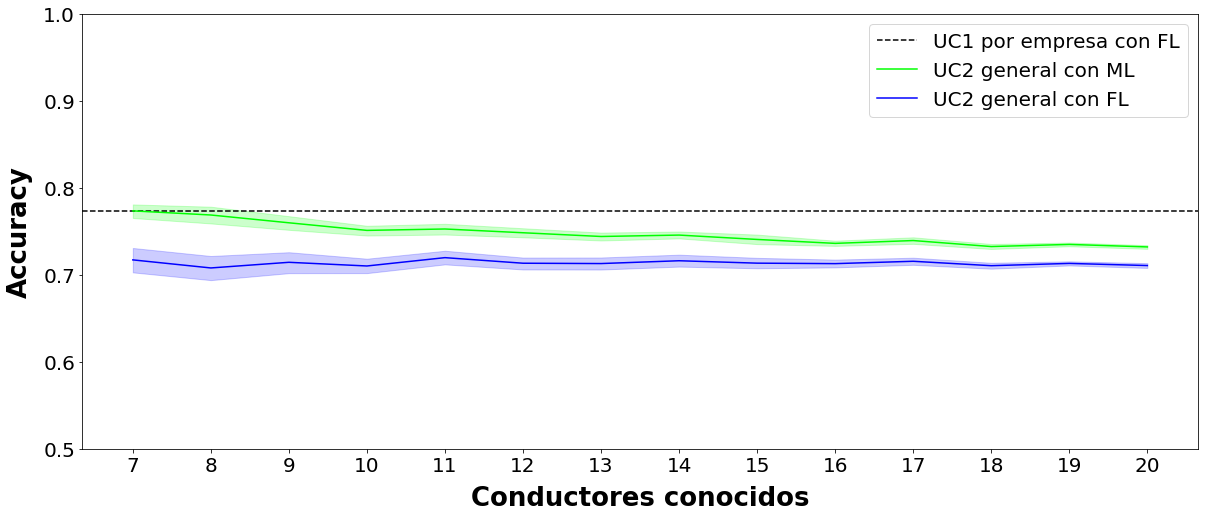

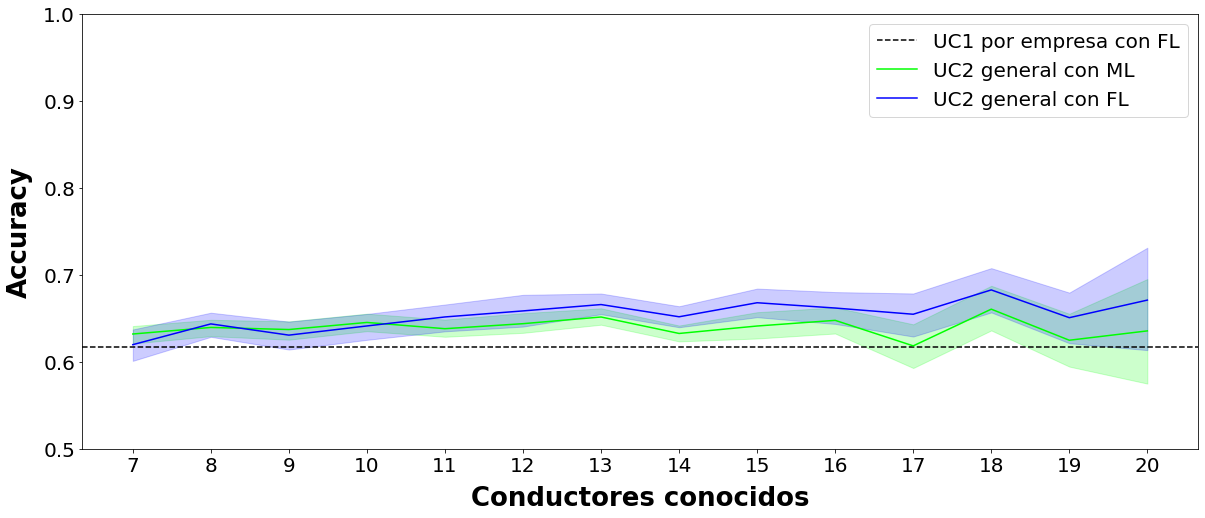

In [40]:
import seaborn as sns

''' Conocidos '''
f = plt.figure(figsize=(20,8))

plt.axhline(UC1_k_thresh , color="black", linestyle="--", label="UC1 por empresa con FL")
sns.lineplot(data=df_conocidos_plot1, x="Usuarios conocidos", y="Accuracy", hue="Modelo", palette= ["#00FF00", "#0000FF"])

size_ticks = 20
plt.xticks(range(7,20+1), fontsize=size_ticks)
plt.yticks(fontsize=size_ticks)
plt.ylim(0.5,1)

size_label = 26
plt.xlabel('Conductores conocidos', fontweight ='bold', labelpad = 10, fontsize = size_label)
plt.ylabel('Accuracy', fontweight ='bold', labelpad = 10,fontsize = size_label)

size_legend = 20; plt.legend(loc='upper right', fontsize = size_legend)

plt.show()
f.savefig('../recursos/PEvsCentvsUC2_known_v2.pdf', bbox_inches='tight')

''' Nuevos '''
f = plt.figure(figsize=(20,8))
plt.axhline(UC1_u_thresh, color="black", linestyle="--", label="UC1 por empresa con FL")
sns.lineplot(data=df_nuevos_plot1, x="Usuarios nuevos", y="Accuracy", hue="Modelo", palette= ["#00FF00", "#0000FF"])

size_ticks = 20
plt.xticks(range(7,20+1), fontsize=size_ticks)
plt.yticks(fontsize=size_ticks)
plt.ylim(0.5,1)

size_label = 26
plt.xlabel('Conductores conocidos', fontweight ='bold', labelpad = 10, fontsize = size_label)
plt.ylabel('Accuracy', fontweight ='bold', labelpad = 10,fontsize = size_label)

size_legend = 20; plt.legend(loc='upper right', fontsize = size_legend)

plt.show()
f.savefig('../recursos/PEvsCentvsUC2_new_v2.pdf', bbox_inches='tight')

### UC2 vs UC3

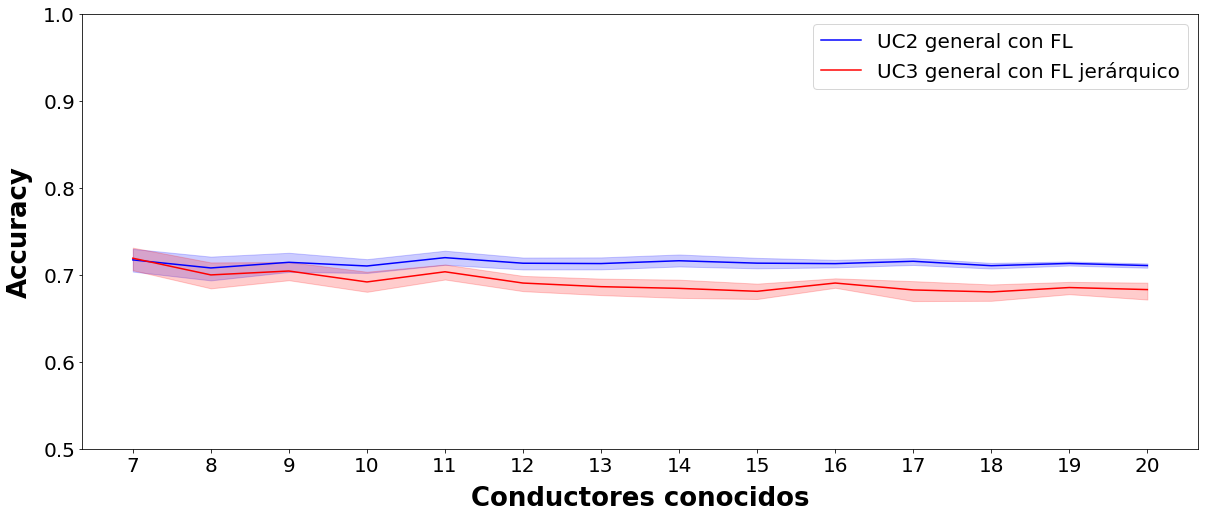

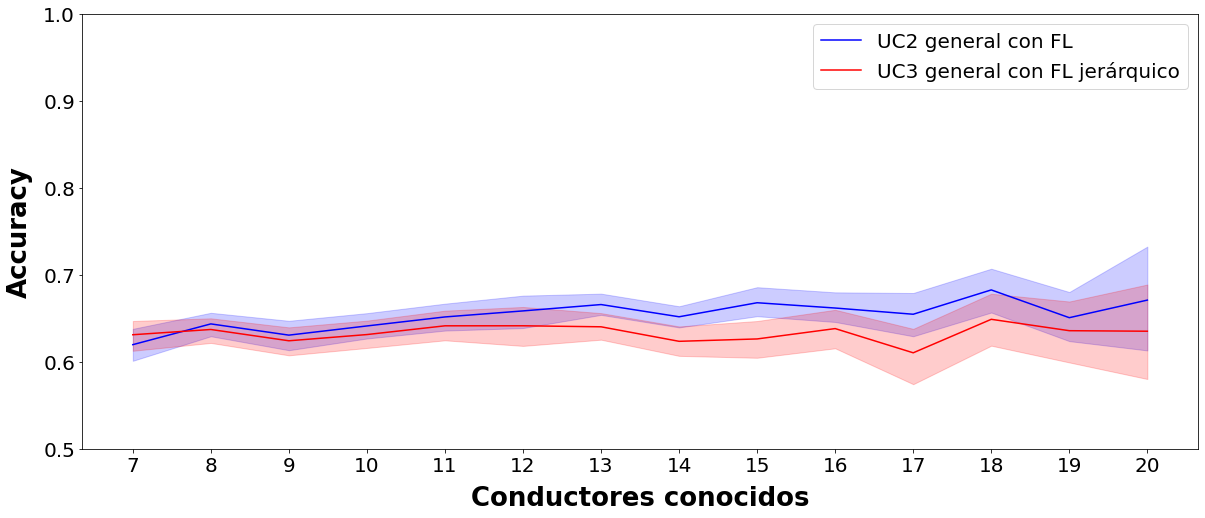

In [41]:
''' Conocidos '''
f = plt.figure(figsize=(20,8))

sns.lineplot(data=df_conocidos_plot2, x="Usuarios conocidos", y="Accuracy", hue="Modelo", palette= ["#0000FF", "#FF0000"])

size_ticks = 20
plt.xticks(range(7,20+1), fontsize=size_ticks)
plt.yticks(fontsize=size_ticks)
plt.ylim(0.5,1)

size_label = 26
plt.xlabel('Conductores conocidos', fontweight ='bold', labelpad = 10,fontsize = size_label)
plt.ylabel('Accuracy', fontweight ='bold', labelpad = 10,fontsize = size_label)

size_legend = 20; plt.legend(loc='upper right', fontsize = size_legend)

plt.show()
f.savefig('../recursos/UC2vsUC3_known.pdf', bbox_inches='tight')

''' Nuevos '''
f = plt.figure(figsize=(20,8))

sns.lineplot(data=df_nuevos_plot2, x="Usuarios nuevos", y="Accuracy", hue="Modelo", palette= ["#0000FF", "#FF0000"])

size_ticks = 20
plt.xticks(range(7,20+1), fontsize=size_ticks)
plt.yticks(fontsize=size_ticks)
plt.ylim(0.5,1)

size_label = 26
plt.xlabel('Conductores conocidos', fontweight ='bold', labelpad = 10,fontsize = size_label)
plt.ylabel('Accuracy', fontweight ='bold', labelpad = 10,fontsize = size_label)

size_legend = 20; plt.legend(loc='upper right', fontsize = size_legend)

plt.show()
f.savefig('../recursos/UC2vsUC3_new.pdf', bbox_inches='tight')